<div style="background-color:#B0C4DE;color:Navy;width:100%;display:inline-block;">
    <b><h2>&nbsp <a id = "1">1 - Import Libraries & Load Data</a></h2></b>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import os

from skimage.transform import rotate # data_augmentation을 하기 위해 사이킷런이미지의 transform에서 rotate를 불러왔다.
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
cd

/Users/ihyeondo


In [165]:
data_train = pd.read_csv('data_story/BigdataAnalysis/digit-recognizer/train.csv')
data_test = pd.read_csv('data_story/BigdataAnalysis/digit-recognizer/test.csv')

labels = data_train["label"] #dataset에서 label 열만 추출하여 labels 객체로 할당시킴
labels = labels.astype('int') 

features = data_train.drop("label", axis = 1) #실제로 train할 


<AxesSubplot:xlabel='count', ylabel='label'>

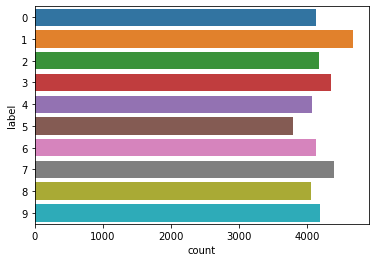

In [10]:
#각 레이블 별 데이터 개수 확인 -> 각 레이블마다 데이터가 몇개로 구성되어 있는지. (불균형한 데이터인지 확인한 과정)
sns.countplot(y='label',data=data_train,order= list(data_train.label.value_counts().index).sort())

In [11]:
#dataset에 결측치 값이 존재하지 않음을 확인함.
print(features.isna().sum().sum())
print(data_test.isna().sum().sum())

0
0


<div style="background-color:#B0C4DE;color:Navy;width:100%;display:inline-block;">
    <b><h2>&nbsp <a id = "2">2 - Some Configuration</a></h2></b>
</div>

In [12]:
sns.set_theme(style = "whitegrid", palette="deep")

<div style="background-color:#B0C4DE;color:Navy;width:100%;display:inline-block;">
    <b><h2>&nbsp <a id = "3">3 - Exploration </a></h2></b>
    <b> --임의의 몇개 image 데이터를 확인해보자.-- </b>
</div>

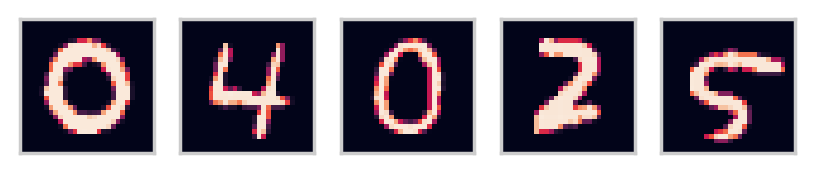

In [13]:
def get_image_matrix(row, dataset):
    row_values = dataset.iloc[row].values
    image_matrix = row_values.reshape(28, 28)
    return image_matrix

fig, ax = plt.subplots(1, 5, figsize=(5, 1), dpi=200)
plt.setp(ax, xticks=[], yticks=[])

ax_num=0
for i in [1,42,783,27000,62]:
    ax[ax_num].imshow(get_image_matrix(i, features))
    ax_num+=1

<div style="background-color:#B0C4DE;color:Navy;width:100%;display:inline-block;">
    <b><h2>&nbsp <a id = "4">4 - Data Augmentation </a></h2></b>
</div>

In [223]:
data_test.iloc[0].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  10,  17,  17,  17,  17,  81, 180, 180,
        35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 139, 253, 253, 253, 253, 253,
       253, 253,  48,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  60, 228, 253, 25

In [224]:
data_aug_1.iloc[0].values

array([1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

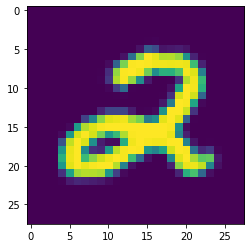

In [42]:
image_aug = []
for x in range(len(data_test)):
    output_s = rotate(get_image_matrix(x,data_test),1, resize=False,cval=0)
    image_aug.append(output_s.reshape(784))
    plt.imshow(output_s)
    

In [45]:
data_test = pd.DataFrame(image_aug)
data_test.columns = features.columns
data_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
image_aug = []
for x in range(len(features)):
    output_s = rotate(get_image_matrix(x,features),1, resize=False,cval=0)
    image_aug.append(output_s.reshape(784))
    plt.imshow(output_s)

In [10]:
data_aug_1 = pd.DataFrame(image_aug)
data_aug_1.columns = features.columns
data_aug_1.insert(0,"label",labels,True)
data_aug_1


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
# data_aug_1.to_csv('data_story/BigdataAnalysis/digit-recognizer/data_aug_1.csv', index=False)

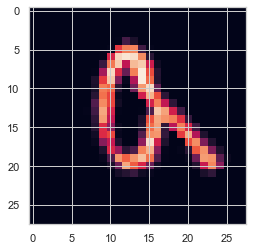

In [12]:
image_aug_45 = []
for x in range(len(features)):
    output_s_45 = rotate(get_image_matrix(x,features),45, resize=False,cval=0)
    image_aug_45.append(output_s_45.reshape(784))
    plt.imshow(output_s_45)

In [13]:
data_aug_45 = pd.DataFrame(image_aug_45)
data_aug_45.columns = features.columns
data_aug_45.insert(0,"label",labels,True)
data_aug_45

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
# data_aug_45.to_csv('data_story/BigdataAnalysis/digit-recognizer/data_aug_45.csv', index=False)

In [3]:
data_aug_1= pd.read_csv('data_story/BigdataAnalysis/digit-recognizer/data_aug_1.csv')
data_aug_45= pd.read_csv('data_story/BigdataAnalysis/digit-recognizer/data_aug_45.csv')
data_aug = pd.concat([data_aug_1,data_aug_45])
data_aug.index = [id_ for id_ in range(84000)]
data_aug

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83995,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83996,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83997,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83998,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
labels_aug = data_aug["label"]
labels_aug = labels_aug.astype('int')

features_aug = data_aug.drop("label", axis = 1)


3


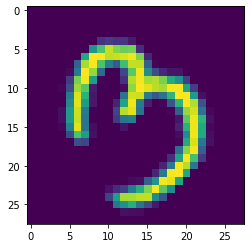

In [6]:
def get_image_matrix(row, dataset):
    row_values = dataset.iloc[row].values
    image_matrix = row_values.reshape(28, 28)
    return image_matrix
print(labels_aug[81999])
plt.imshow(get_image_matrix(81999,features_aug))


<div style="background-color:#B0C4DE;color:Navy;width:100%;display:inline-block;">
    <b><h2>&nbsp <a id = "5">5 - Principal Component Analysis </a></h2></b>
</div>

In [9]:
n_comp = 60
pca = PCA(n_components=n_comp) #,whiten=True)
pca_train = pca.fit_transform(features_aug)
pca_test = pca.transform(data_test)

result_train = pd.DataFrame(pca_train, columns=['PCA_%i' % i for i in range(n_comp)])
result_test = pd.DataFrame(pca_test, columns =['PCA_%i' % i for i in range(n_comp)])    

In [10]:
result_test

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,PCA_50,PCA_51,PCA_52,PCA_53,PCA_54,PCA_55,PCA_56,PCA_57,PCA_58,PCA_59
0,1653.242086,801.456438,458.208603,713.916202,816.422325,-26.359960,98.928165,523.201963,566.316234,-235.320119,...,56.762957,-29.426125,-192.158612,39.373495,-61.078797,21.765986,71.076533,-38.288416,-62.393496,124.052493
1,1929.856530,444.513395,-10.455677,101.607920,-75.744120,786.884759,-226.598305,1127.417502,588.948319,-256.865122,...,-45.247006,-61.480250,-62.243194,-203.750296,43.346638,-23.479023,79.881636,9.439698,-7.056300,-46.912176
2,308.197649,515.260892,116.084883,644.580014,111.973878,-0.724173,-200.124551,423.133742,-268.728899,-287.776070,...,100.026245,-57.993505,193.218467,14.318205,-199.525253,0.637278,-68.845328,-87.017273,-46.521148,-61.320456
3,598.204651,521.024147,785.530107,577.591565,185.271987,163.078737,-40.539525,242.821458,4.390436,-71.985243,...,-95.870167,100.511211,115.140594,79.642283,-47.240561,-223.959046,95.275822,42.386502,-13.748691,98.383575
4,737.454081,814.769163,-400.772324,930.803265,666.070008,15.433217,-56.678933,59.136423,453.860554,529.733275,...,110.483742,68.121426,-92.797645,146.336326,20.426048,-144.387318,-237.987977,-151.863614,-96.032717,-37.258617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,975.392518,-307.739933,368.833619,1679.760806,34.925138,214.881718,-534.405604,120.122617,99.998342,25.644017,...,162.496415,34.175486,-251.887939,-59.580289,-49.487632,-10.490025,40.950350,33.788164,-67.273969,-191.229483
27996,512.400356,-125.057974,230.069232,758.520879,-255.964999,478.587402,-372.306530,149.395486,61.292050,416.141041,...,-150.357510,159.977914,-48.309365,-29.616355,-138.226517,-106.799079,13.402367,-119.378323,15.420827,-100.536383
27997,714.855548,401.919198,-1014.656667,1119.034836,280.983647,345.899314,-461.488243,258.360852,10.320549,493.818048,...,174.288460,213.666396,-24.256657,-72.595981,-42.655311,4.748910,-70.479760,-25.925173,-116.490548,9.254579
27998,730.175857,317.547179,228.585083,1642.402464,-165.231654,144.826943,-285.927037,798.460336,-274.681553,274.107244,...,-61.662934,154.036799,10.517460,-65.457813,-185.731172,-62.022325,-104.956297,-135.073958,3.499080,-23.637278


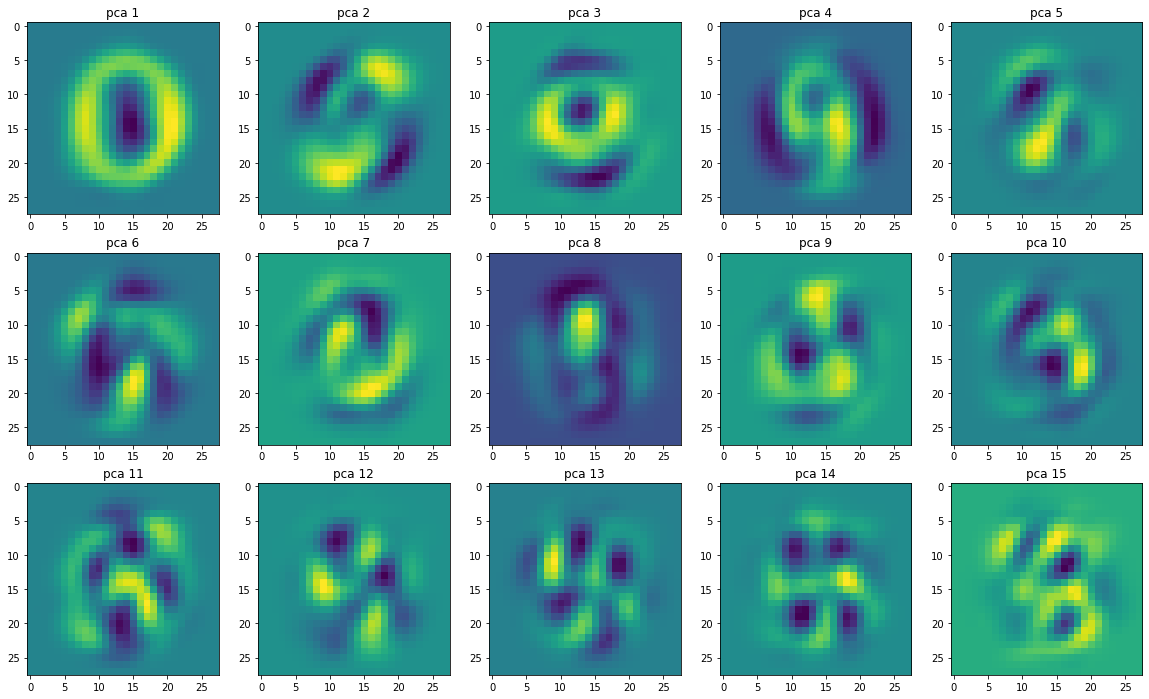

In [11]:
fig , axes = plt.subplots(3,5,figsize=(20,12))
for i, (component,ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(28,28),cmap = 'viridis')
    ax.set_title("pca {}".format(i+1))

<div style="background-color:#B0C4DE;color:Navy;width:100%;display:inline-block;">
    <b><h2>&nbsp <a id = "6">6 - Model </a></h2></b>
</div>

In [12]:
scaler = StandardScaler() #standardScaler를 해준 이유는 각 피처가 현재 비연속적으로 분포되어있기 때문에 평균이 0이고 분산이 1인 분포로 데이터를 구성시킴.
data_train_s = scaler.fit_transform(result_train)
data_test_s = scaler.transform(result_test)
# data_train
x_train, x_test, y_train, y_test = train_test_split(data_train_s, labels_aug, test_size=0.3, random_state=42)

svm = SVC(random_state=42)

svm.fit(x_train, y_train)
accuracy_train = round(svm.score(x_train, y_train) * 100, 2)
accuracy_test = round(svm.score(x_test, y_test) * 100, 2)

print("Training Accuracy: % {}".format(accuracy_train))
print("Testing Accuracy: % {}".format(accuracy_test)) 

Training Accuracy: % 99.03
Testing Accuracy: % 97.36


## 교차검증

In [14]:
x_train,x_test,y_train,y_test = train_test_split(result_train,labels_aug,test_size=0.3,random_state=42)

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

pipe_model = make_pipeline(StandardScaler(),SVC(random_state=42))
svm_cross = cross_val_score(pipe_model, x_train, y_train, cv=3, scoring="accuracy")
print(svm_cross)

[0.96892857 0.96928571 0.97      ]


In [16]:
from sklearn.ensemble import RandomForestClassifier

pipe_model = make_pipeline(StandardScaler(),RandomForestClassifier(random_state=42))
forest_cross = cross_val_score(pipe_model,x_train,y_train,cv=3,scoring='accuracy')
print(forest_cross)


[0.93       0.93234694 0.93193878]


In [17]:
from sklearn.neighbors import KNeighborsClassifier

pipe_model = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=5, weights='distance'))
knn_acc = cross_val_score(pipe_model, x_train, y_train, cv=3, scoring="accuracy")
print(knn_acc)

[0.94561224 0.94566327 0.94760204]


In [18]:
from sklearn.naive_bayes import GaussianNB

pipe_model = make_pipeline(StandardScaler(),GaussianNB())
nb_acc = cross_val_score(pipe_model, x_train, y_train, cv=3, scoring="accuracy")
print(nb_acc)
#아래 교차검증 결과에서 볼 수 있듯이 나이브 베이즈 분류는 확실히 일반화 성능이 낮다.

[0.80887755 0.81244898 0.81020408]


In [202]:
#추가할 알고리즘 넣기
from sklearn.ensemble import GradientBoostingClassifier

pipe_model = make_pipeline(StandardScaler(),GradientBoostingClassifier(random_state=0))
gbrt_acc = cross_val_score(pipe_model, x_train, y_train, cv=3, scoring="accuracy")

print(gbrt_acc)
# print("학습용 데이터 세트 정확도 점수: {:.3f}".format(gbrt.score(x_train,y_train)))
# print("평가용 데이터 세트 정확도 점수: {:.3f}".format(gbrt.score(x_test,y_test)))

[0.88397959 0.88739796 0.88719388]


In [203]:
from sklearn.neural_network import MLPClassifier

pipe_model = make_pipeline(StandardScaler(),MLPClassifier(random_state=42))
mlp_acc = cross_val_score(pipe_model, x_train, y_train, cv=3, scoring="accuracy")

print(mlp_acc)

[0.9525     0.9527551  0.95392857]


<div style="background-color:#B0C4DE;color:Navy;width:100%;display:inline-block;">
    <b><h2>&nbsp <a id = "7">7 - Hyperparameter Tuning & Predict results</a></h2></b>
    <b>
        위 다양한 알고리즘중 서포터 백터머신(SVM)이 가장 높은 수치를 보여줬다. SVM에 그리드 서치를 진행하여 가장 적합한 파라미터를 찾아보자
</div>

In [22]:
def print_grid_results(grid):
    # print best parameter after tuning
    print('*'*75)
    print(grid.best_params_)
    print('*'*75)

    # print classification report
    print(classification_report(y_test, grid_predictions))

In [23]:
param_grid = {'C':[0.1, 1, 10],
               'gamma':['scale'], #어차피 위에서 standardscaler를 진행하였기 때문에 auto와 scale의 기능은 동일화된다. auto는 1/features개수 & scale은 1/(features개수 * std값) 
               'kernel':['rbf'],
               'random_state':[42]
               }

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)

# fitting the model for grid search
grid.fit(x_train, y_train)

grid_predictions = grid.predict(x_test)

print_grid_results(grid)

***************************************************************************
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 42}
***************************************************************************
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2466
           1       0.99      0.99      0.99      2855
           2       0.97      0.98      0.98      2463
           3       0.98      0.97      0.98      2608
           4       0.98      0.98      0.98      2489
           5       0.98      0.98      0.98      2269
           6       0.99      0.99      0.99      2466
           7       0.98      0.98      0.98      2604
           8       0.98      0.98      0.98      2471
           9       0.98      0.96      0.97      2509

    accuracy                           0.98     25200
   macro avg       0.98      0.98      0.98     25200
weighted avg       0.98      0.98      0.98     25200



In [24]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
#pipe_model = Pipeline([('scaler',StandardScaler()),('svm',SVC())])
pipe_model = make_pipeline(StandardScaler(),SVC())
x_train_p,x_test_p,y_train_p,y_test_p = train_test_split(result_train, labels_aug, test_size=0.3, random_state=42)

param_grid = {'svc__C':[0.1, 1, 10],
               'svc__gamma':['scale'], #어차피 위에서 standardscaler를 진행하였기 때문에 auto와 scale의 기능은 동일화된다. auto는 1/features개수 & scale은 1/(features개수 * std값) 
               'svc__kernel':['rbf'],  #poly sigmoid linear 각 진행해서 비교해보기. 
               'svc__random_state':[42]
               }
grid_p = GridSearchCV(pipe_model, param_grid, refit=True, verbose=0)

grid_p.fit(x_train_p, y_train_p)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10], 'svc__gamma': ['scale'],
                         'svc__kernel': ['rbf'], 'svc__random_state': [42]})

In [25]:
def print_grid_results_p(grid):
    # print best parameter after tuning
    print('*'*75)
    print(grid.best_params_)
    print('*'*75)

    # print classification report
    print(classification_report(y_test, grid_p_predictions))
grid_p_predictions = grid_p.predict(x_test_p)

print_grid_results_p(grid_p)

***************************************************************************
{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__random_state': 42}
***************************************************************************
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2466
           1       0.99      0.99      0.99      2855
           2       0.96      0.98      0.97      2463
           3       0.98      0.97      0.97      2608
           4       0.97      0.98      0.98      2489
           5       0.98      0.98      0.98      2269
           6       0.98      0.99      0.99      2466
           7       0.97      0.97      0.97      2604
           8       0.98      0.97      0.97      2471
           9       0.97      0.96      0.97      2509

    accuracy                           0.98     25200
   macro avg       0.98      0.98      0.98     25200
weighted avg       0.98      0.98      0.98     25200



In [43]:
param_grid = {'C':[0.1, 1, 10],
               'gamma':['scale'], #어차피 위에서 standardscaler를 진행하였기 때문에 auto와 scale의 기능은 동일화된다. auto는 1/features개수 & scale은 1/(features개수 * std값) 
               'kernel':['linear'],  #poly sigmoid linear 각 진행해서 비교해보기. 
               'random_state':[42]
               }

grid_l = GridSearchCV(SVC(), param_grid, refit=True)

# fitting the model for grid search
grid_l.fit(x_train, y_train)

grid_predictions = grid_l.predict(x_test)

print_grid_results(grid_l)

***************************************************************************
{'C': 10, 'gamma': 'scale', 'kernel': 'linear', 'random_state': 42}
***************************************************************************
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1643
           1       0.94      0.98      0.96      1908
           2       0.84      0.86      0.85      1645
           3       0.86      0.85      0.86      1722
           4       0.86      0.91      0.89      1655
           5       0.81      0.79      0.80      1516
           6       0.91      0.93      0.92      1640
           7       0.92      0.89      0.90      1746
           8       0.87      0.81      0.84      1650
           9       0.87      0.84      0.85      1675

    accuracy                           0.88     16800
   macro avg       0.88      0.88      0.88     16800
weighted avg       0.88      0.88      0.88     16800



<div style="background-color:#B0C4DE;color:Navy;width:100%;display:inline-block;">
    <b><h2>&nbsp <a id = "7">7 - Prediction </a></h2></b>
</div>

In [26]:
svm = SVC(C=10, gamma='scale', kernel='rbf', random_state=42)

svm.fit(x_train, y_train)
accuracy_train = round(svm.score(x_train, y_train) * 100, 2)
accuracy_test = round(svm.score(x_test, y_test) * 100, 2)

print("Train Accuracy: % {}".format(accuracy_train))
print("Testing Accuracy: % {}".format(accuracy_test))

Train Accuracy: % 99.94
Testing Accuracy: % 98.03


In [48]:
predictions = grid_p.predict(result_test)

data_submission = pd.read_csv("data_story/BigdataAnalysis/digit-recognizer/sample_submission.csv")
data_submission['Label'] = predictions
data_submission.to_csv('data_story/BigdataAnalysis/digit-recognizer/submission2.csv', index=False)

In [49]:
predictions

array([2, 0, 9, ..., 3, 9, 2])

4


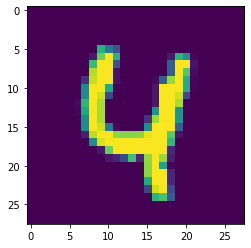

In [219]:
i = 180
print(predictions[i])
plt.imshow(get_image_matrix(i,data_test))

<div style="background-color:#B0C4DE;color:Navy;width:100%;display:inline-block;">
    <b><h2>&nbsp <a id = "7">8 - Apply goodnote image </a></h2></b>
    <b>
        직접 굿노트에 쓴 숫자 이미지를 모델에 넣어 예측을 잘하는지 확인해보았다.
    </b>
</div>

In [274]:
pipe_model_s = make_pipeline(StandardScaler(),SVC())
x_train_ps,x_test_ps,y_train_ps,y_test_ps = train_test_split(data_train_sa, labels_aug, test_size=0.3, random_state=42)

param_grid = {'svc__C':[0.1, 1, 10],
               'svc__gamma':['scale'], #어차피 위에서 standardscaler를 진행하였기 때문에 auto와 scale의 기능은 동일화된다. auto는 1/features개수 & scale은 1/(features개수 * std값) 
               'svc__kernel':['rbf'],  #poly sigmoid linear 각 진행해서 비교해보기. 
               'svc__random_state':[42]
               }
grid_ps = GridSearchCV(pipe_model_s, param_grid, refit=True, verbose=0)

grid_ps.fit(x_train_ps, y_train_ps)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10], 'svc__gamma': ['scale'],
                         'svc__kernel': ['rbf'], 'svc__random_state': [42]})

In [59]:
accuracy_s_train = round(grid_ps.score(x_train_ps, y_train_ps) * 100, 2)
accuracy_s_test = round(grid_ps.score(x_test_ps, y_test_ps) * 100, 2)

print("Train Accuracy: % {}".format(accuracy_s_train))
print("Testing Accuracy: % {}".format(accuracy_s_test))


Train Accuracy: % 99.91
Testing Accuracy: % 96.69


In [263]:
data_train_sa = scaler.fit_transform(features_aug)
x_train_ps,x_test_ps,y_train_ps,y_test_ps = train_test_split(data_train_sa, labels_aug, test_size=0.3, random_state=42)
svm_sample = SVC(C=10, gamma='scale', kernel='rbf', random_state=42)
svm_sample.fit(x_train_ps, y_train_ps)

accuracy_s_train = round(svm_sample.score(x_train_ps, y_train_ps) * 100, 2)
accuracy_s_test = round(svm_sample.score(x_test_ps, y_test_ps) * 100, 2)

print("Train Accuracy: % {}".format(accuracy_s_train))
print("Testing Accuracy: % {}".format(accuracy_s_test))


Train Accuracy: % 99.9
Testing Accuracy: % 96.69


In [171]:
features_aug

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [299]:
import cv2
import matplotlib.pyplot as plt
src = cv2.imread("Downloads/3.png",cv2.IMREAD_COLOR)
dst = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
image = cv2.resize(dst, (28, 28),interpolation=cv2.INTER_LINEAR)
image = 255 - image
data_image = scaler.fit_transform(image)
a_r = rotate(data_image,1, resize=False)

a_r_df = pd.DataFrame(a_r.reshape(1,784), columns = ['pixel'+str(i) for i in range(784)])

In [300]:
a_r_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,-0.063101,-0.207055,-0.06589,-0.216361,0.0,0.0,0.0,-0.040462,-0.174543,-0.196204,...,-0.359674,-0.448751,-0.324357,-0.412475,-0.105619,-0.221016,-0.067282,0.0,0.0,0.0


/opt/homebrew/Caskroom/miniforge/base/envs/tf2/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tf2/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


[8]
[8]


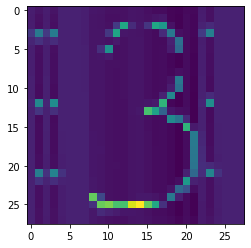

In [301]:
predictions_grid = grid_ps.predict(a_r_df)
predictions_svm = svm_sample.predict(a_r_df)

print(predictions_grid)
print(predictions_svm)
plt.imshow(a_r)
# plt.imshow(image)